In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest



## K Means Clustering Visualization

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.056874
For n_clusters = 2 The average silhouette_score is : 0.21387919334233468


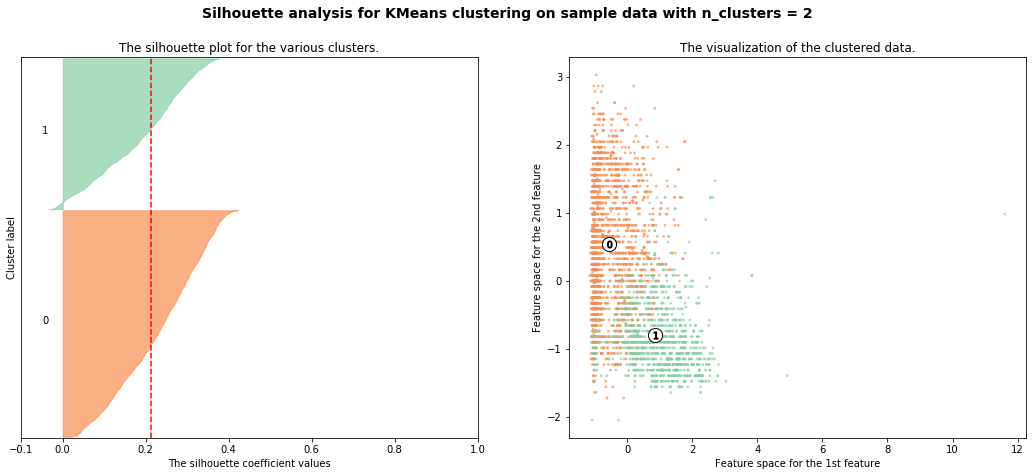

In [13]:
import utils
X_train, X_test,y_train,y_test = utils.wine_preprocess()
#################################################
#K means clustering

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X_train)
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap((float(i)+0.5) / n_clusters)

        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap((cluster_labels.astype(float)+0.5) / n_clusters)

    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( X_train[:, 3], X_train[:, 10], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 3], centers[:, 10], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[3], c[10], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Wine_2class_K_means_{}.png'.format(n_clusters)
    fig.savefig(title, dpi=fig.dpi)
    


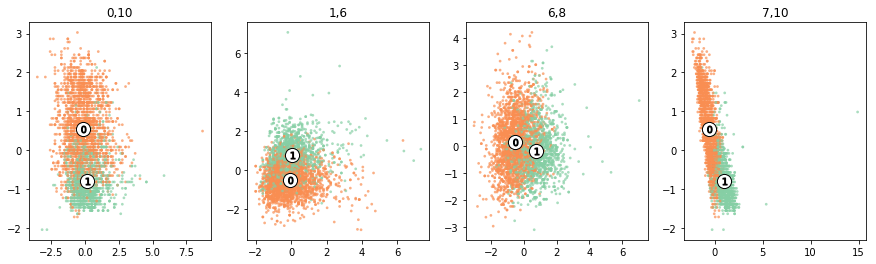

In [14]:
### Showing Various Features Space 
import itertools as it
#rounds = list(it.combinations(range(0,11), 2))
rounds = [(0,10),(1,6),(6,8),(7,10)]

plt.figure(figsize=(15,4))

for i,selected in enumerate(rounds):
    plt.subplot(1,4,i+1)
    plt.scatter( X_train[:, selected[0]], X_train[:, selected[1]], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, selected[0]], centers[:, selected[1]], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter( c[selected[0]], c[selected[1]], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        
    plt.title("{},{}".format(selected[0],selected[1]))
plt.show()


## Gaussian Mixture Visualization

NMI score: 0.036404


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


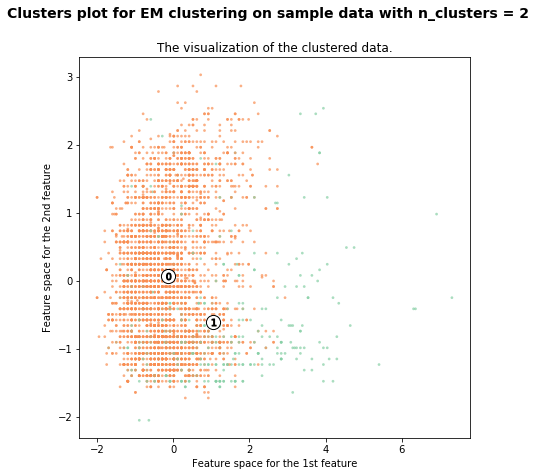

In [16]:
from sklearn.mixture import GaussianMixture

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(X_train)
    cluster_labels = clusterer.predict(X_train)
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap((cluster_labels.astype(float)+0.5) / n_clusters)
    plt.scatter( X_train[:, 1], X_train[:, 10], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 1], centers[:, 10], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[1], c[10], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Wine_2Class_GaussianMixture_{}.png'.format(n_clusters)
    fig.savefig(title, dpi=fig.dpi)


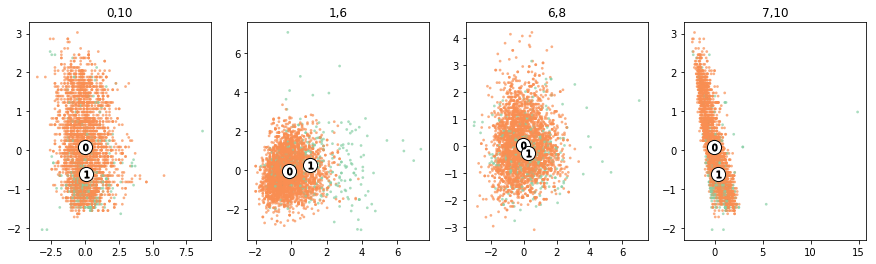

In [17]:
### Showing Various Features Space 
import itertools as it
rounds = [(0,10),(1,6),(6,8),(7,10)]

plt.figure(figsize=(15,4))

for i,selected in enumerate(rounds):
    plt.subplot(1,4,i+1)
    plt.scatter( X_train[:, selected[0]], X_train[:, selected[1]], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, selected[0]], centers[:, selected[1]], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter( c[selected[0]], c[selected[1]], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        
    plt.title("{},{}".format(selected[0],selected[1]))
plt.show()


## PCA Visualization

explained variance ratio: [0.29137994 0.14259432 0.10929232 0.09379593 0.0888931  0.08607803
 0.06774223 0.05451487 0.03715745 0.02646173 0.00209008]
[3.20605222 1.56896464 1.20254292 1.03203624 0.97809037 0.94711622
 0.74536749 0.59982686 0.40884326 0.2911583  0.02299712]


{'boxes': [<matplotlib.lines.Line2D at 0x7f0b4205d400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0b4205de10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b42061ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b420616a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0b4205d550>,
  <matplotlib.lines.Line2D at 0x7f0b4205d9e8>]}

<Figure size 432x288 with 0 Axes>

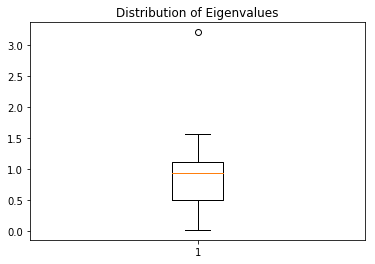

In [137]:
#PCA feature transformation

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=11, random_state=10)
X_r = pca.fit(X_train).transform(X_train)
X_pca = X_r
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ["b","r"]
lw = 1

'''
for color, i in zip(colors, [0,1]):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.8, lw=lw, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine Quality dataset')
plt.xlabel("Value in 1st Component")
plt.ylabel("Value in 2nd component")
'''

eigenvalues = pca.explained_variance_
print(eigenvalues)
plt.figure()
plt.title('Distribution of Eigenvalues')
plt.boxplot(eigenvalues)

Text(0,0.5,'Cumulative % of Variance')

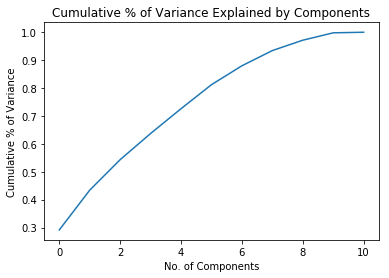

In [138]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative % of Variance Explained by Components')
plt.xlabel("No. of Components")
plt.ylabel("Cumulative % of Variance")


Text(0,0.5,'Cumulative % of Variance')

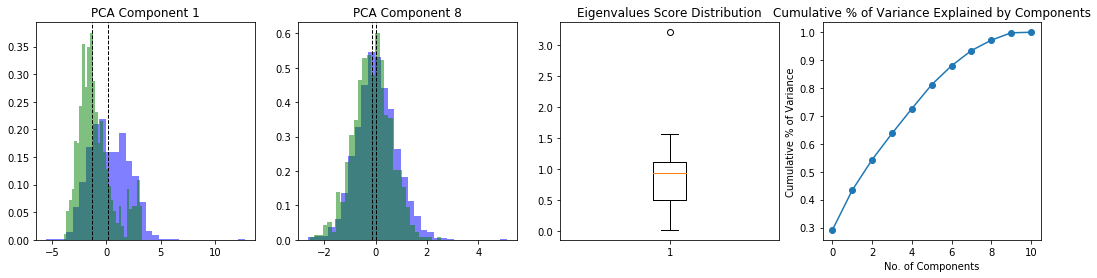

In [136]:
features = [0,7]

plt.figure(figsize=(18,4))
for i,feature in enumerate(features):
    plt.subplot(1,4,i+1)
    plt.hist(X_r[y_train == 0,feature],density=True,alpha=0.5,color=colors[0],bins=30)
    plt.axvline(np.median(X_r[y_train == 0,feature]), color='k', linestyle='dashed', linewidth=1)
    plt.hist(X_r[y_train == 1,feature],density=True,alpha=0.5,color=colors[1],bins=30)
    plt.axvline(np.median(X_r[y_train == 1,feature]), color='k', linestyle='dashed', linewidth=1)
    plt.title('PCA Component {}'.format(feature+1))

plt.subplot(1,4,3)
plt.boxplot(pca.explained_variance_)
plt.title('Eigenvalues Score Distribution')

plt.subplot(1,4,4)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title('Cumulative % of Variance Explained by Components')
plt.xlabel("No. of Components")
plt.ylabel("Cumulative % of Variance")

#    plt.title('Group {}'.format(i))

## ICA Visualization

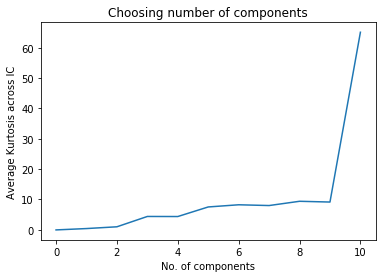

In [139]:
from scipy.stats import kurtosis, skew

avg_kurt = []
for component in range(1,12):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=10)
    X_r = ica.fit(X_train).transform(X_train)
    X_ica = X_r
    
    avg_kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica)))

plt.plot(avg_kurt)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')


ica = FastICA(n_components=11, random_state=10)
X_r = ica.fit(X_train).transform(X_train)
X_ica = X_r


In [50]:
from scipy.stats import kurtosis, skew

for i in range(0,11):
    print("kurtosis of component {} = {}".format(i,kurtosis(X_ica[:,i])))

kurtosis of component 0 = -0.8880060214257268
kurtosis of component 1 = 624.2478081942312
kurtosis of component 2 = 47.53883025753001
kurtosis of component 3 = 0.8730510784763634
kurtosis of component 4 = 1.2529401598131447
kurtosis of component 5 = 2.1266550497652696
kurtosis of component 6 = 0.6089883783064791
kurtosis of component 7 = 1.537169337744185
kurtosis of component 8 = 17.7393039981934
kurtosis of component 9 = 4.357039508051343
kurtosis of component 10 = 5.2848554810232695


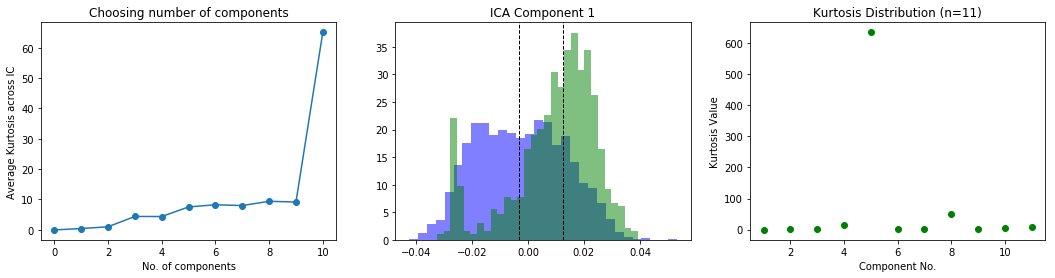

In [101]:
from scipy.stats import kurtosis, skew

plt.figure(figsize=(18,4))

avg_kurt = []
for component in range(1,12):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=10)
    X_r = ica.fit(X_train).transform(X_train)
    X_ica = X_r
    
    avg_kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica)))

plt.subplot(1,3,1)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')
plt.plot(avg_kurt,'-o')

#ICA feature transformation
    
ica = FastICA(n_components=11, random_state=10)
X_r = ica.fit(X_train).transform(X_train)
X_ica = X_r

colors = ["b","g"]
lw = 2

plt.subplot(1,3,2)

feature = 0
plt.hist(X_r[y_train == 0,feature],density=True,alpha=0.5,color=colors[0],bins=30)
plt.axvline(np.median(X_r[y_train == 0,feature]), color='k', linestyle='dashed', linewidth=1)
plt.hist(X_r[y_train == 1,feature],density=True,alpha=0.5,color=colors[1],bins=30)
plt.axvline(np.median(X_r[y_train == 1,feature]), color='k', linestyle='dashed', linewidth=1)
plt.title('ICA Component 1')


import numpy as np
kurtosis =  np.apply_along_axis(kurtosis, 0, X_ica)

plt.subplot(1,3,3)
plt.title('Kurtosis Distribution (n=11)')
plt.scatter(range(1,12),kurtosis,c='g')
plt.ylabel('Kurtosis Value')
plt.xlabel('Component No.')

plt.show()

## Randomized Projection

In [140]:
rca = GaussianRandomProjection(n_components=5, random_state=10)
X_r = rca.fit_transform(X_train)
X_rca = X_r

## Feature Selection by Chi-Sq Score

In [141]:
#Univariate feature selection (K best)

from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

clf = SelectKBest(chi2, k=4)
X_new = clf.fit_transform(X_train+4, y_train)
X_fs = X_new


In [142]:
all_data = [X_pca,X_ica,X_rca,X_fs]
names = ['PCA','ICA','RCA','FS']

## Visualize Different Trials of Randomized Projection

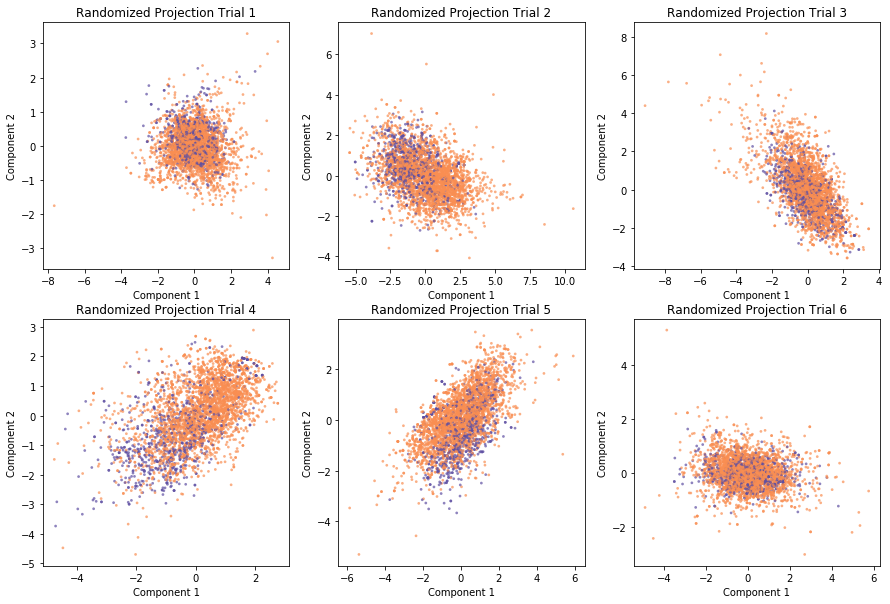

In [17]:
states = [10,13,16,19,21,23]

plt.figure(figsize=(15,10))

for i,state in enumerate(states):
    #Random Projection feature transformation
    rca = GaussianRandomProjection(n_components=5, random_state=state)
    X_r = rca.fit_transform(X_train)
    X_rca = X_r
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cmap(y_train.astype(float)+0.5 / n_clusters)

    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    plt.subplot(2,3,i+1)
    plt.scatter( X_rca[:, 0], X_rca[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    plt.title('Randomized Projection Trial {}'.format(i+1))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.show()


## Rerunning Clustering after DR

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.056874
For n_clusters = 2 The average silhouette_score is : 0.21387919334196429


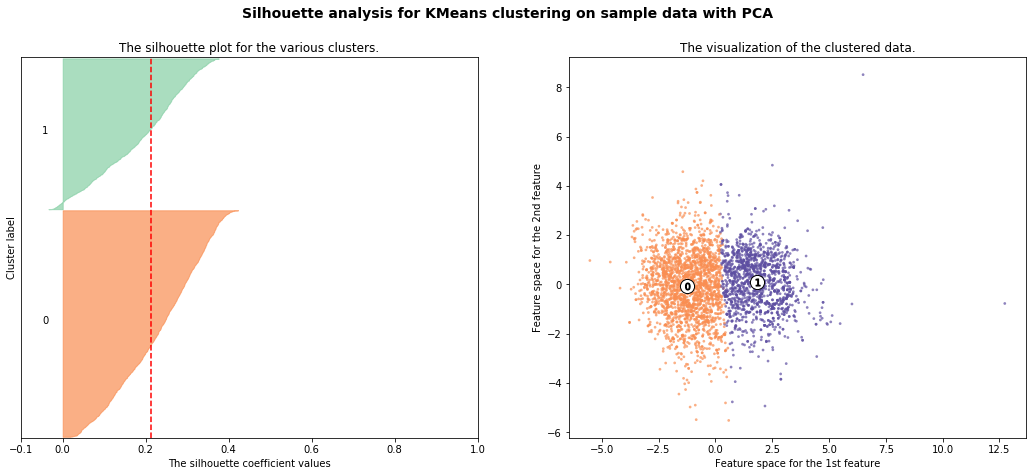

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.023098
For n_clusters = 2 The average silhouette_score is : 0.08050615277045461


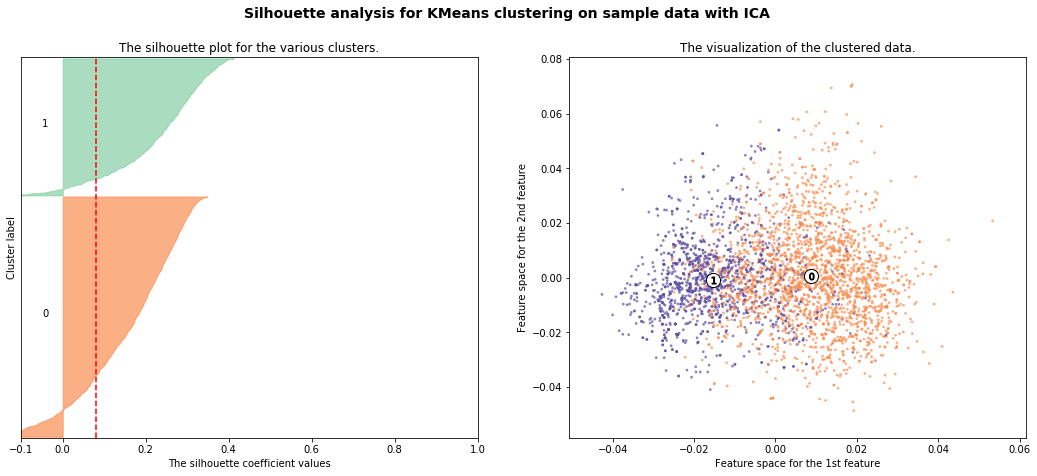

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.057044
For n_clusters = 2 The average silhouette_score is : 0.35038813770912236


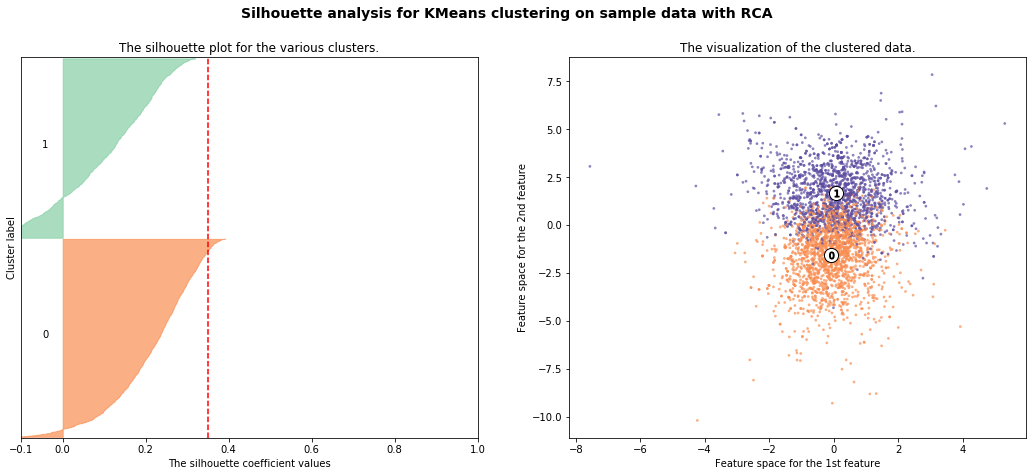

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.088820
For n_clusters = 2 The average silhouette_score is : 0.38795936805058573


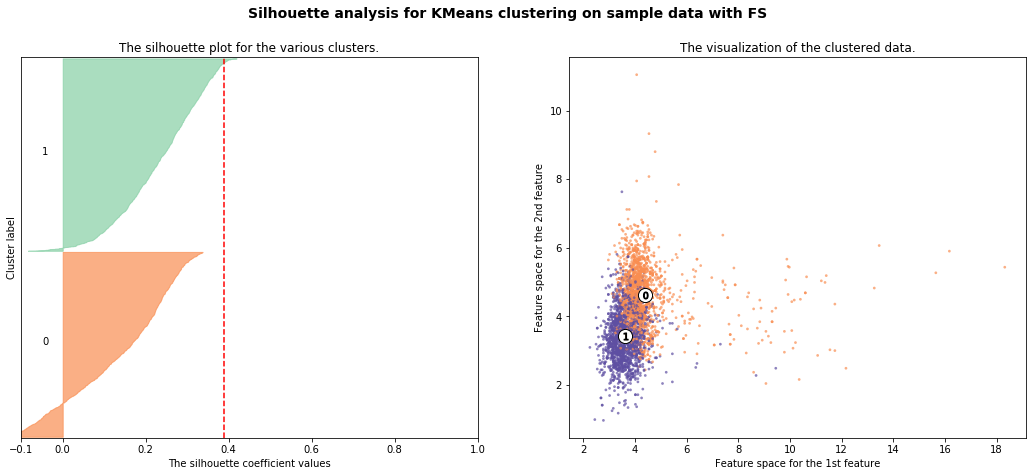

In [144]:
#################################################
#K means clustering

for data,method in zip(all_data,names):
    
    n_clusters=2

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap((float(i)+0.5) / n_clusters)

        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float)+0.5 / n_clusters)

    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with {}".format(method)),
                 fontsize=14, fontweight='bold')

    plt.show()

    title = 'Wine_2class_PCA_K_means_{}.png'.format(method)
    fig.savefig(title, dpi=fig.dpi)
    


NMI score: 0.036404


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


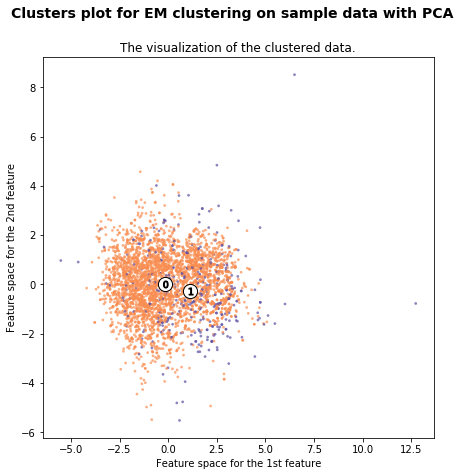

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.054287


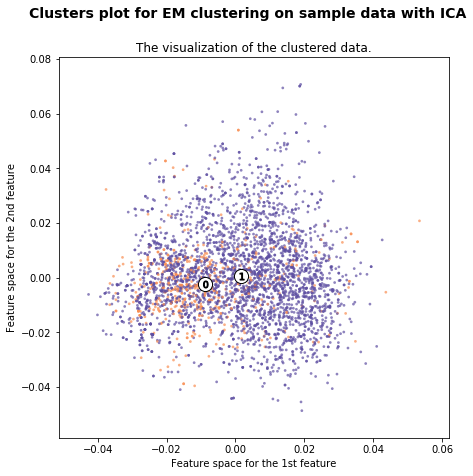

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.028903


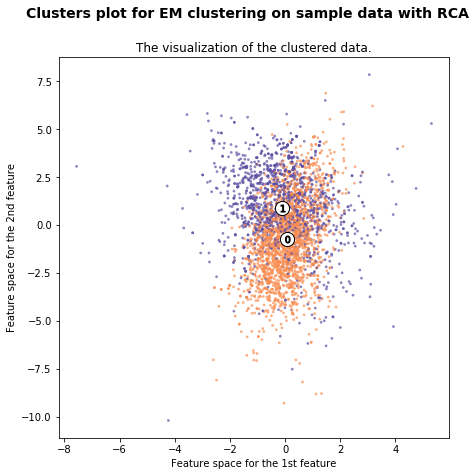

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.021454


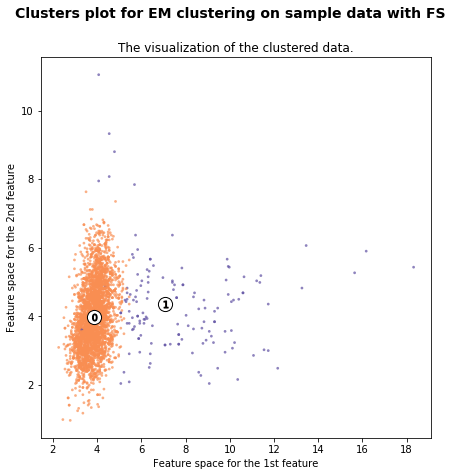

In [146]:
from sklearn.mixture import GaussianMixture

n_clusters=2

for data,method in zip(all_data,names):
    
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(data)
    cluster_labels = clusterer.predict(data)
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float)+0.5 / n_clusters)
    plt.scatter( data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on sample data "
                  "with {}".format(method)),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Wine_2Class_GaussianMixture_{}.png'.format(method)
    fig.savefig(title, dpi=fig.dpi)


In [3]:
## Save PCA + KMeans Results into new dataframe

## PCA 
pca = PCA(n_components=11, random_state=10)
X_r = pca.fit(X_train).transform(X_train)
X_pca = X_r

## Export these files to run in Jython
y_train_o = np.reshape(y_train,(y_train.shape[0],1))
y_test_o = np.reshape(y_test,(y_test.shape[0],1))

#output_train = np.concatenate((X_pca,y_train_o),axis=1)
#np.savetxt("X_train_pca.csv", output_train, delimiter=",")
X_test_transformed = pca.transform(X_test)
#output_test = np.concatenate((X_test_transformed,y_test_o),axis=1)
#np.savetxt("X_test_pca.csv", output_test, delimiter=",")

## PCA + KMeans
clusterer = KMeans(n_clusters=2, random_state=10).fit(X_pca)
y_kmeans = np.reshape(clusterer.labels_,(clusterer.labels_.shape[0],1))
X_pca_kmeans_train =np.concatenate((X_pca,y_kmeans),axis=1)
output_train = np.concatenate((X_pca_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_pca_kmeans.csv", output_train, delimiter=",")

y_kmeans_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
X_pca_kmeans_test =np.concatenate((X_test_transformed,y_kmeans_test),axis=1)
output_test = np.concatenate((X_pca_kmeans_test,y_test_o),axis=1)
np.savetxt("X_test_pca_kmeans.csv", output_test, delimiter=",")

print(output_train.shape)
print(output_test.shape)


## PCA + Gaussian 
clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(X_pca)
cluster_labels = clusterer.predict(X_pca)
y_gaussian = np.reshape(cluster_labels,(cluster_labels.shape[0],1))
X_pca_gaussian_train =np.concatenate((X_pca,y_gaussian),axis=1)
output_train = np.concatenate((X_pca_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_pca_gaussian.csv", output_train, delimiter=",")

y_gaussian_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
X_pca_gaussian_test =np.concatenate((X_test_transformed,y_gaussian_test),axis=1)
output_test = np.concatenate((X_pca_gaussian_test,y_test_o),axis=1)
np.savetxt("X_test_pca_gaussian.csv", output_test, delimiter=",")

print(output_train.shape)
print(output_test.shape)



(3673, 13)
(1225, 13)
(3673, 13)
(1225, 13)


"\nplot_confusion_matrix(y_train, y_kmeans, classes=[1,2],normalize=False,\n                      title='Confusion matrix Training')\nplot_confusion_matrix(y_test, y_kmeans_test, classes=[1,2],normalize=False,\n                      title='Confusion matrix Testing')\nplot_confusion_matrix(y_train, y_gaussian, classes=[1,2],normalize=False,\n                      title='Confusion matrix Training')\nplot_confusion_matrix(y_test, y_gaussian_test, classes=[1,2],normalize=False,\n                      title='Confusion matrix Testing')\n\n"

In [3]:
## Save ICA + KMeans Results into new dataframe
all_labels = []

## ICA 
ica = FastICA(n_components=11, random_state=10)
X_r = ica.fit(X_train).transform(X_train)
X_ica = X_r

## Export these files to run in Jython
y_train_o = np.reshape(y_train,(y_train.shape[0],1))
y_test_o = np.reshape(y_test,(y_test.shape[0],1))

output_train = np.concatenate((X_ica,y_train_o),axis=1)
np.savetxt("X_train_ica.csv", output_train, delimiter=",")
X_test_transformed = ica.transform(X_test)
output_test = np.concatenate((X_test_transformed,y_test_o),axis=1)
np.savetxt("X_test_ica.csv", output_test, delimiter=",")
print(output_train.shape)
print(output_test.shape)
print(output_train[0,:])
print(output_test[0,:])

## ICA + KMeans
clusterer = KMeans(n_clusters=2, random_state=10).fit(X_ica)
y_kmeans = np.reshape(clusterer.labels_,(clusterer.labels_.shape[0],1))
X_ica_kmeans_train =np.concatenate((X_ica,y_kmeans),axis=1)
output_train = np.concatenate((X_ica_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_ica_kmeans.csv", output_train, delimiter=",")

y_kmeans_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
all_labels.append(y_kmeans_test)
X_ica_kmeans_test =np.concatenate((X_test_transformed,y_kmeans_test),axis=1)
output_test = np.concatenate((X_ica_kmeans_test,y_test_o),axis=1)
np.savetxt("X_test_ica_kmeans.csv", output_test, delimiter=",")
print(output_train.shape)
print(output_test.shape)
print(output_train[0,:])
print(output_test[0,:])
## ica + Gaussian 
clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(X_ica)
cluster_labels = clusterer.predict(X_ica)
y_gaussian = np.reshape(cluster_labels,(cluster_labels.shape[0],1))
X_ica_gaussian_train =np.concatenate((X_ica,y_gaussian),axis=1)
output_train = np.concatenate((X_ica_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_ica_gaussian.csv", output_test, delimiter=",")

y_gaussian_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
all_labels.append(y_gaussian_test)
X_ica_gaussian_test =np.concatenate((X_test_transformed,y_gaussian_test),axis=1)
output_test = np.concatenate((X_ica_gaussian_test,y_test_o),axis=1)
np.savetxt("X_test_ica_gaussian.csv", output_test, delimiter=",")
print(output_train.shape)
print(output_test.shape)
print(output_train[0,:])
print(output_test[0,:])
plot_confusion_matrix(y_train, y_kmeans, classes=[1,2],normalize=False,
                      title='Confusion matrix Training')
plot_confusion_matrix(y_test, y_kmeans_test, classes=[1,2],normalize=False,
                      title='Confusion matrix Testing')
plot_confusion_matrix(y_train, y_gaussian, classes=[1,2],normalize=False,
                      title='Confusion matrix Training')
plot_confusion_matrix(y_test, y_gaussian_test, classes=[1,2],normalize=False,
                      title='Confusion matrix Testing')


(3673, 12)
(1225, 12)
[ 0.03084523  0.00101101 -0.01313069  0.00729855  0.02071246  0.00067926
  0.01004831  0.00320727  0.00773847 -0.00695691  0.00213311  0.        ]
[ 0.00268271 -0.00985879 -0.00441731  0.00079887 -0.01478104 -0.00684151
 -0.01899521 -0.00360153  0.02251171 -0.00319184 -0.00798467  0.        ]
(3673, 13)
(1225, 13)
[ 3.08452343e-02  1.01101177e-03 -1.31306910e-02  7.29855437e-03
  2.07124643e-02  6.79259610e-04  1.00483050e-02  3.20726807e-03
  7.73847316e-03 -6.95690752e-03  2.13311227e-03  1.00000000e+00
  0.00000000e+00]
[ 2.68271132e-03 -9.85878924e-03 -4.41730505e-03  7.98872522e-04
 -1.47810380e-02 -6.84150723e-03 -1.89952129e-02 -3.60153439e-03
  2.25117079e-02 -3.19184275e-03 -7.98467429e-03  1.00000000e+00
  0.00000000e+00]
(3673, 13)
(1225, 13)
[ 3.08452343e-02  1.01101177e-03 -1.31306910e-02  7.29855437e-03
  2.07124643e-02  6.79259610e-04  1.00483050e-02  3.20726807e-03
  7.73847316e-03 -6.95690752e-03  2.13311227e-03  1.00000000e+00
  0.00000000e+00]
[

NameError: name 'plot_confusion_matrix' is not defined

(3673, 6)
(1225, 6)
[ 1.7495057  -0.4118133  -0.26168088 -0.55983605  0.07691862  0.        ]
[ 0.13054126 -0.38692715 -0.75997977  0.23054341 -0.14582326  0.        ]
(3673, 7)
(1225, 7)
[ 1.7495057  -0.4118133  -0.26168088 -0.55983605  0.07691862  1.
  0.        ]
[ 0.13054126 -0.38692715 -0.75997977  0.23054341 -0.14582326  1.
  0.        ]
(3673, 7)
(1225, 7)
[ 1.7495057  -0.4118133  -0.26168088 -0.55983605  0.07691862  1.
  0.        ]
[ 0.13054126 -0.38692715 -0.75997977  0.23054341 -0.14582326  1.
  0.        ]
Confusion matrix, without normalization
[[1587 1294]
 [ 181  611]]
Confusion matrix, without normalization
[[521 436]
 [ 71 197]]
Confusion matrix, without normalization
[[1385 1496]
 [ 218  574]]
Confusion matrix, without normalization
[[443 514]
 [ 76 192]]
(3673, 6)
(1225, 6)
[-2.78312126 -0.28239196 -0.26010287  0.16058845  1.86107532  0.        ]
[-2.15929336 -1.87983788 -0.88448355  0.62986808 -0.71518812  0.        ]
(3673, 7)
(1225, 7)
[-2.78312126 -0.28239196 -0.

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


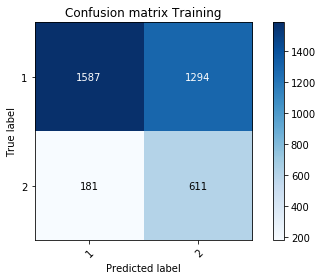

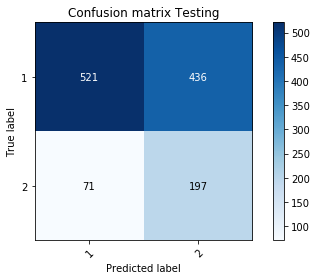

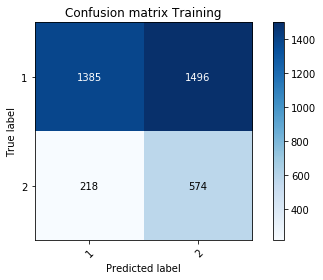

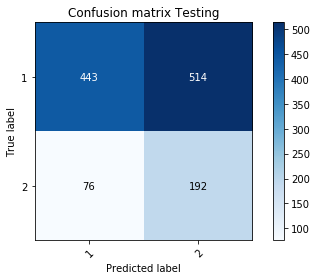

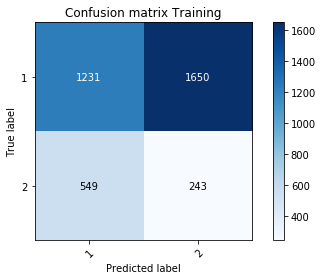

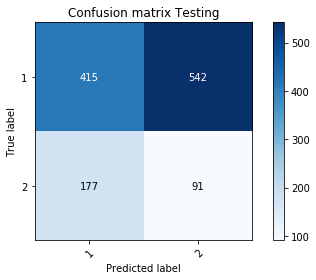

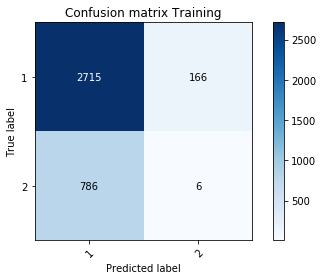

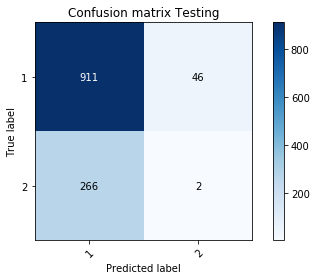

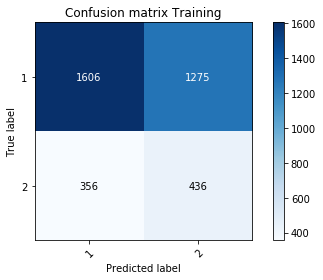

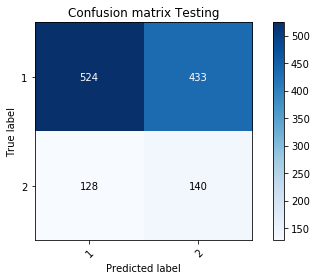

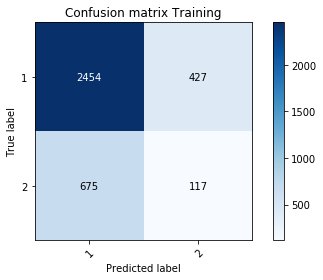

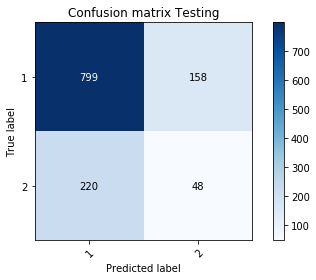

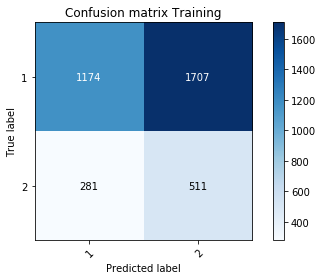

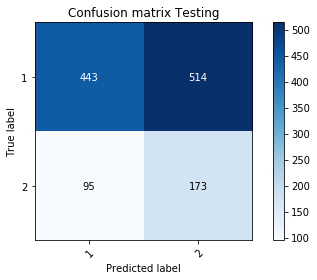

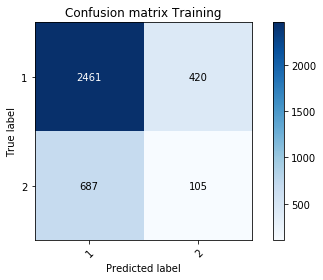

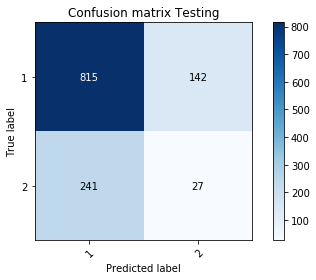

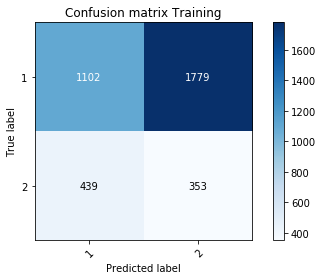

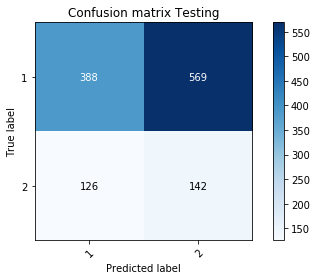

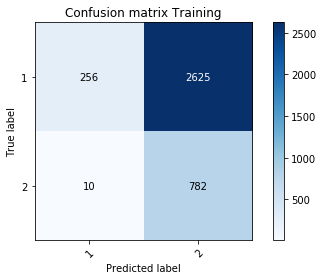

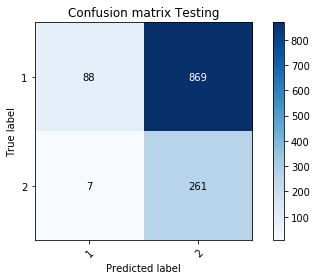

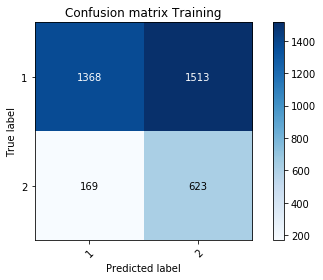

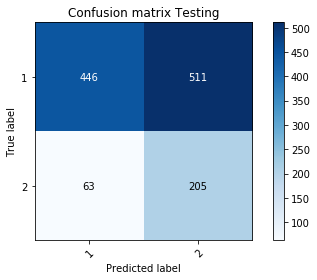

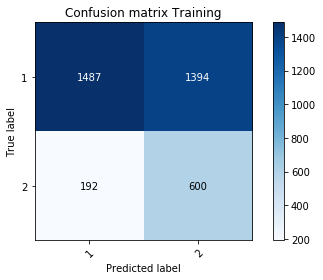

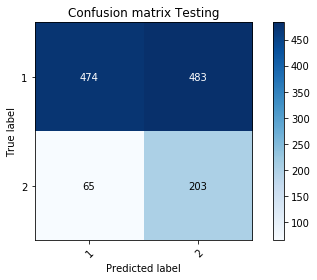

In [19]:
states = [10,13,16,19,21,23]

for i,state in enumerate(states):
    #Random Projection feature transformation
    rca = GaussianRandomProjection(n_components=5, random_state=state)
    X_r = rca.fit_transform(X_train)
    X_rca = X_r

    ## Export these files to run in Jython
    y_train_o = np.reshape(y_train,(y_train.shape[0],1))
    y_test_o = np.reshape(y_test,(y_test.shape[0],1))

    output_train = np.concatenate((X_rca,y_train_o),axis=1)
    np.savetxt("X_train_rca_{}.csv".format(i), output_train, delimiter=",")
    X_test_transformed = rca.transform(X_test)
    output_test = np.concatenate((X_test_transformed,y_test_o),axis=1)
    np.savetxt("X_test_rca_{}.csv".format(i), output_test, delimiter=",")

    print(output_train.shape)
    print(output_test.shape)
    print(output_train[0,:])
    print(output_test[0,:])
    ## RCA + KMeans
    clusterer = KMeans(n_clusters=2, random_state=10).fit(X_rca)
    y_kmeans = np.reshape(clusterer.labels_,(clusterer.labels_.shape[0],1))
    X_rca_kmeans_train =np.concatenate((X_rca,y_kmeans),axis=1)
    output_train = np.concatenate((X_rca_kmeans_train,y_train_o),axis=1)
    np.savetxt("X_train_rca_kmeans_{}.csv".format(i), output_train, delimiter=",")

    y_kmeans_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
    X_rca_kmeans_test =np.concatenate((X_test_transformed,y_kmeans_test),axis=1)
    output_test = np.concatenate((X_rca_kmeans_test,y_test_o),axis=1)
    np.savetxt("X_test_rca_kmeans_{}.csv".format(i), output_test, delimiter=",")

    ## rca + Gaussian 
    clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(X_rca)
    cluster_labels = clusterer.predict(X_rca)
    y_gaussian = np.reshape(cluster_labels,(cluster_labels.shape[0],1))
    X_rca_gaussian_train =np.concatenate((X_rca,y_gaussian),axis=1)
    output_train = np.concatenate((X_rca_kmeans_train,y_train_o),axis=1)
    np.savetxt("X_train_rca_gaussian_{}.csv".format(i), output_train, delimiter=",")

    y_gaussian_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
    X_rca_gaussian_test =np.concatenate((X_test_transformed,y_gaussian_test),axis=1)
    output_test = np.concatenate((X_rca_gaussian_test,y_test_o),axis=1)
    np.savetxt("X_test_rca_gaussian_{}.csv".format(i), output_test, delimiter=",")


In [8]:
#Feature Selection
from sklearn.feature_selection import chi2
clf = SelectKBest(chi2, k=4)
X_new = clf.fit_transform(X_train+4, y_train)
X_fs = X_new
X_test_transformed = clf.transform(X_test)

## Export these files to run in Jython
y_train_o = np.reshape(y_train,(y_train.shape[0],1))
y_test_o = np.reshape(y_test,(y_test.shape[0],1))

output_train = np.concatenate((X_fs,y_train_o),axis=1)
np.savetxt("X_train_fs.csv", output_train, delimiter=",")
output_test = np.concatenate((X_test_transformed,y_test_o),axis=1)
np.savetxt("X_test_fs.csv", output_test, delimiter=",")

## Feature Selection + KMeans
clusterer = KMeans(n_clusters=2, random_state=10).fit(X_fs)
y_kmeans = np.reshape(clusterer.labels_,(clusterer.labels_.shape[0],1))
X_fs_kmeans_train =np.concatenate((X_fs,y_kmeans),axis=1)
output_train = np.concatenate((X_fs_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_fs_kmeans.csv", output_train, delimiter=",")

y_kmeans_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
X_fs_kmeans_test =np.concatenate((X_test_transformed,y_kmeans_test),axis=1)
output_test = np.concatenate((X_fs_kmeans_test,y_test_o),axis=1)
np.savetxt("X_test_fs_kmeans.csv", output_test, delimiter=",")

## fs + Gaussian 
clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(X_fs)
cluster_labels = clusterer.predict(X_fs)
y_gaussian = np.reshape(cluster_labels,(cluster_labels.shape[0],1))
X_fs_gaussian_train =np.concatenate((X_fs,y_gaussian),axis=1)
output_train = np.concatenate((X_fs_kmeans_train,y_train_o),axis=1)
np.savetxt("X_train_fs_gaussian.csv", output_train, delimiter=",")

y_gaussian_test = np.reshape(clusterer.predict(X_test_transformed),(y_test.shape[0],1))
X_fs_gaussian_test =np.concatenate((X_test_transformed,y_gaussian_test),axis=1)
output_test = np.concatenate((X_fs_gaussian_test,y_test_o),axis=1)
np.savetxt("X_test_fs_gaussian.csv", output_test, delimiter=",")



(3673, 5)
(1225, 5)
[3.8821281  5.0444607  3.56484617 4.22701118 0.        ]
[ 0.20951327 -0.28659898 -0.13517854 -0.9106184   0.        ]
(3673, 6)
(1225, 6)
[3.8821281  5.0444607  3.56484617 4.22701118 1.         0.        ]
[ 0.20951327 -0.28659898 -0.13517854 -0.9106184   0.          0.        ]
(3673, 6)
(1225, 6)
[3.8821281  5.0444607  3.56484617 4.22701118 1.         0.        ]
[ 0.20951327 -0.28659898 -0.13517854 -0.9106184   0.          0.        ]


NameError: name 'plot_confusion_matrix' is not defined